# 1. Loading and reading of the cleaned dataset 

In [1]:
#downloaded the dataset from the UCI repository archive 
#(https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

#decompressed the RAR file 
#turned the arff file into csv (using Python converter)

# now loading full csv into the notebook

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/cleaned.csv', header = 0, on_bad_lines='skip')

#there are only 25 features so no need to load only a subset of the features and no need to use chunksize

In [3]:
data = data.drop(data.columns[0], axis=1)

In [4]:
data

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,...,pe_no,pe_yes,sg_1.005,sg_1.010,sg_1.015,sg_1.020,sg_1.025,pcc_notpresent,pcc_present,class
0,-0.205954,0.583606,0.626585,1.043279,0.250168,-0.313799,-0.414139,-0.324225,0.040817,-0.064328,...,1,0,0,0,0,1,0,1,0,1
1,-2.640637,0.000000,-0.099558,-0.452605,-1.961241,-0.313799,-0.775077,-0.400624,0.040817,-0.064328,...,1,0,0,0,0,1,0,1,0,1
2,0.625402,0.000000,-0.946724,-1.072850,0.250168,3.719296,-0.073253,-0.209627,0.040817,-0.064328,...,1,0,0,1,0,0,0,1,0,1
3,-0.205954,-0.940620,-0.825700,-0.489090,-0.486968,-0.367217,-0.013096,0.172368,-2.843192,-0.726016,...,0,1,1,0,0,0,0,0,1,1
4,-0.027806,-0.119883,-0.462629,-0.343150,0.250168,-0.514118,-0.614660,-0.286026,0.040817,-0.064328,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.209724,0.231861,0.989656,1.152734,0.250168,-0.060061,-0.153461,-0.457924,1.322598,0.109800,...,1,0,0,0,0,1,0,1,0,0
382,-0.562249,1.756087,1.836822,1.444614,-0.486968,-0.928112,-0.514399,-0.324225,0.361262,-0.377759,...,1,0,0,0,0,0,1,1,0,0
383,-2.343724,0.818102,1.231703,1.189219,0.250168,-0.594246,-0.614660,-0.438824,-0.065998,-0.064328,...,1,0,0,0,0,1,0,1,0,0
384,-2.046812,1.404343,1.473751,0.605459,-1.224104,-0.407281,-0.133409,-0.362425,-0.279629,0.109800,...,1,0,0,0,0,0,1,1,0,0


## 2.5 Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#target variable
y = data['class']
y

#predictors
x = data.copy()
x.drop('class', inplace=True, axis=1)

In [7]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#randomstate for reproducibility

# 3. Fitting logistic regression  (giusto per avere un modello)

In [8]:
#import 
from sklearn.linear_model import LogisticRegression


#instance of the model 
logreg = LogisticRegression()

#the model learns the relationship between predictors and label 
logreg.fit(X_train, y_train)

#predict the label on test set 
y_pred = logreg.predict(X_test)

In [9]:
y_pred #y_hat

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [10]:
y_test = y_test.copy().values #y_actual (trasformati da series a array)
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [11]:
#CODICE PER GENERARMI LA CONFUSION MATRIX DATI ACTUAL VALUES E PREDICTIONS 

#Given two lists that have the predicted and actual values, I can pass them to 

def generate_matrix_entries(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:                #se prediction = actual = 1 -> TP
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:   #se prediction = 1 but different from the actual -> FP
           FP += 1
        if y_actual[i]==y_hat[i]==0:                #se prediction = actual = 0 -> TN
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:   #se prediction = 0 but different from the actual -> FN
           FN += 1

    return (TN,FP,FN,TP)

#np.array([[TN, FP],
#            [FN, TP]])   #così come la ottengo da sklearn -> rimessa in lista per fare l'assignment simultaneo poi


#in teoria a questa funzione devo aggiungere un ciclo for sul threshold per ottenere tutte le varie 
#CM associate a ciascun valore del threshold 
#(  dalle CM poi normalizzo e prendo le coordinate
#   e mi devo estrarre anche fpr e tpr per ROC)

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred) #check della struttura perchè l'output è diverso dal paper cioè è inversa

#TP=79
#TN=48
#FP=1
#FN=0

array([[48,  1],
       [ 0, 79]])

In [13]:
#MODELLO OTTIENE PREDICTIONS SULLA BASE DI QUESTE PROBS 

#probability che ciascun elemento appartenga alla classe 0 e stesso per classe 1
probs = logreg.predict_proba(X_test) 

#prendo probabilità associata alla classe 1 
preds = probs[:,1] #y_probs -> un valore tra 0 e 1 -> quello che confronto con threshold 

#preds #P(Y=1)

In [14]:
#DEFINISCO IL VETTORE CON TUTTI I VALORI DEL THRESHOLD 

thresholds = np.arange(0,1.01,0.01) #0.001 - discretizzo con pochi poi eventualmente ne aggiungo
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [15]:
#QUI PER OGNI VALORE DEL THRESHOLD MI CALCOLO TUTTO QUELLO CHE MI SERVE 

#il codice è brutto inizializzando tutte le liste ma intanto così funziona  
#--> 
# 1. itero sui valori del threshold 
# 2. avendo le P(Y=1) per ciascun record in y_test faccio il confronto con il threshold (per farlo lo rendo vettore)
#    così ottengo il vettore con le predizioni 
# 3. quindi utilizzo la funzione definita sopra (generate_matrix) per generarmi le matrici per ciascun record 
#    inputting actual (che sono quelle del test) e le pred appena calcolate 
#    e mi salvo tutti i risultati che poi appendo alla lista definita inizialmente (che poi converto in df)
#    -   da un lato mi creo la confusion matrix (each_CM) ---> coordinate per CT [3D]
#    -   dall'altro mi calcolo fpr e tpr --> coordinate per ROC [2D]    


all_nCM = []
all_ts = []
all_TPR = []
all_FPR = []

#questo per la normalizzazione delle entries, è costante quindi me lo salvo qui 
N= len(y_test)

#poi triggero il for 
for i in range(len(thresholds)):
    
    t = thresholds[i]
    all_ts.append(round(t,3)) #che poi me lo metto nel dataframe 
    
    t_vec = np.ones(preds.size)*t #t mi serve con dimensioni comparabili 
                                  #alla y_pred (quindi è vettore colonna con singolo t ripetuto)
        
    y_pred = (preds >= t_vec).astype(int) #vettore di boolean poi turned into binary
                                          #risultante dal confronto di P(Y=1) >= threshold (confronto vettori)
    
    (TN, FP, FN, TP) = generate_matrix_entries(y_test, y_pred)
    
    each_CM = np.array([TN, FP,FN, TP])
    
    each_FPR = FP/(FP+TN) # = 1-specificity --> x
    each_TPR = TP/(TP+FN) # = sensitivity --> y
    
    
    each_nCM = each_CM/N
    all_nCM.append(each_nCM)
    
    all_FPR.append(each_FPR)
    all_TPR.append(each_TPR)
    

PD_all_nCM = pd.DataFrame(all_nCM) 


coords = PD_all_nCM.drop([2],axis=1) #coordinata di FN non ci interessa

coords['threshold'] = all_ts
coords.rename({0: 'TN', 1: 'FP', 3: 'TP'}, axis=1, inplace=True)

coords['TPR']=all_TPR
coords['FPR']=all_FPR   #per avere tutto in un unico df (quindi a sx coord per 3D, a dx coord per 2D)

coords

#QUESTO POI MAGARI ME LO METTO IN UNA FUNZIONE tipo obtain_DF(preds, y_test, threshold)                                                   

,TN,FP,TP,threshold,TPR,FPR
0,0.000000,0.382812,0.617188,0.00,1.000000,1.000000
1,0.164062,0.218750,0.617188,0.01,1.000000,0.571429
2,0.234375,0.148438,0.617188,0.02,1.000000,0.387755
3,0.250000,0.132812,0.617188,0.03,1.000000,0.346939
4,0.257812,0.125000,0.617188,0.04,1.000000,0.326531
...,...,...,...,...,...,...
96,0.382812,0.000000,0.507812,0.96,0.822785,0.000000
97,0.382812,0.000000,0.476562,0.97,0.772152,0.000000
98,0.382812,0.000000,0.453125,0.98,0.734177,0.000000
99,0.382812,0.000000,0.421875,0.99,0.683544,0.000000


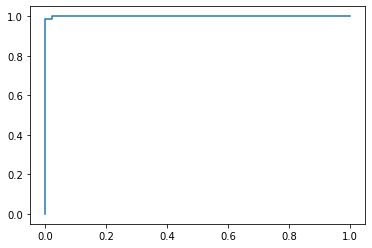

In [16]:
plt.plot(coords['FPR'],coords['TPR'])
plt.show() #esempio di ROC bella 

In [17]:
# per visualizzare i punti sul tetraedro uso il codice delle altre applicazioni
# mettendo ciclo for sul numero di threshold per aggiungere ogni volta la trace

In [40]:
import numpy as np
import plotly.graph_objects as go

"""--- QUESTO ERA IL RISULTATO DI STANOTTE, ORA SONO RIUSCITA A METTERLI CON LA LINEA 

fig = go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], #verticalmente ho definito O, C, B, A
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],
        
        color = 'grey',

        #colors = colorRamp(c("red",'yellow','white','green','blue')),
        
        # Intensity of each vertex, which will be interpolated 
        #and color-coded
        #intensity=[0, 0.33, 0.66, 1],
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        #showscale=True
    )
])


for i in range(coords.shape[0]):
    fig.add_trace(go.Scatter3d(mode='markers', 
                               x= [coords['TP'][i]],  #perchè la matrice è definita diversamente
                               y= [coords['TN'][i]], 
                               z= [coords['FP'][i]], 
                               marker = dict(color='yellow', size=5), showlegend=False))

    

fig.show()


#mi torna 
#ROC lavora su due assi che sono funzione delle stesse 3 variabili (fp,tn,tp) che io uso per ambiente CT
#   ( each_FPR = FP/(FP+TN) #=1-specificity --> x )
#   ( each_TPR = TP/(TP+FN) #=sensitivity --> y   )
#quindi ci sta che si sposti a sinistra



#PROB FORSE è CHE VOGLIO LINEA CHE UNISCE QUESTI PUNTI NON PUNTI SINGOLI -> TODO 
#lo stesso per le visualizzazioni successive
"""


'--- QUESTO ERA IL RISULTATO DI STANOTTE, ORA SONO RIUSCITA A METTERLI CON LA LINEA \n\nfig = go.Figure(data=[\n    go.Mesh3d(\n        x=[0, 0, 0, 1], #verticalmente ho definito O, C, B, A\n        y=[0, 0, 1, 0],\n        z=[0, 1, 0, 0],\n        \n        color = \'grey\',\n\n        #colors = colorRamp(c("red",\'yellow\',\'white\',\'green\',\'blue\')),\n        \n        # Intensity of each vertex, which will be interpolated \n        #and color-coded\n        #intensity=[0, 0.33, 0.66, 1],\n        \n        opacity = 0.2, #for transparency\n        \n        # i, j and k sono i vertici dei triangoli\n        # here we represent the 4 triangles of the tetrahedron surface\n        i=[0, 0, 0, 1],\n        j=[1, 2, 3, 2],\n        k=[2, 3, 1, 3],\n        name=\'y\',\n        #showscale=True\n    )\n])\n\n\nfor i in range(coords.shape[0]):\n    fig.add_trace(go.Scatter3d(mode=\'markers\', \n                               x= [coords[\'TP\'][i]],  #perchè la matrice è definita diversa

In [41]:
#CODICE PER GENERARE LINE PLOT 3D DELLA ROC 

fig = go.Figure(data=go.Scatter3d(
    x= coords['TP'], 
    y= coords['TN'], 
    z=coords['FP'],
    marker=dict(
        size=1, #pallini per quelli assocaiti al threshold quindi in realtà
        #color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='green',
        width=3
    )
))

"""
fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
"""

fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], 
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        color ='lightgrey',
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])



fig.show()

In [42]:
#QUI LA VISUALIZZAZIONE CON LO SLIDER - anche se in effetti non ha troppo senso poi vedendo il random case 

#QUINDI AL VARIARE DEL THRESHOLD COME SI SPOSTA IL PUNTO 
#PER MOSTRARE LA TRAIETTORIA IN MANIERA DINAMICA 

import plotly.express as px 

"""
fig = px.scatter_3d(coords, 
                    x='TP',
                    y='TN',
                    z='FP',
                    animation_frame='threshold',
                    size_max=18,
                    hover_name ='threshold',
                    range_x=[0,1], 
                    range_y=[0,1],
                    range_z=[0,1]) 


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='yellow')),
                  selector=dict(mode='circle-open'))



fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], 
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        color ='lightgrey',
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])
"""

"\nfig = px.scatter_3d(coords, \n                    x='TP',\n                    y='TN',\n                    z='FP',\n                    animation_frame='threshold',\n                    size_max=18,\n                    hover_name ='threshold',\n                    range_x=[0,1], \n                    range_y=[0,1],\n                    range_z=[0,1]) \n\n\nfig.update_traces(marker=dict(size=12,\n                              line=dict(width=2,\n                                        color='yellow')),\n                  selector=dict(mode='circle-open'))\n\n\n\nfig.add_trace(go.Figure(data=[\n    go.Mesh3d(\n        x=[0, 0, 0, 1], \n        y=[0, 0, 1, 0],\n        z=[0, 1, 0, 0],\n\n        color ='lightgrey',\n        \n        opacity = 0.2, #for transparency\n        \n        # i, j and k sono i vertici dei triangoli\n        # here we represent the 4 triangles of the tetrahedron surface\n        i=[0, 0, 0, 1],\n        j=[1, 2, 3, 2],\n        k=[2, 3, 1, 3],\n        name

# Questo era per la ROC buona, ora mi serve ROC brutta

In [43]:
all_nCM = []
all_ts = []

all_TPR = []
all_FPR = []


N= len(y_test)
for i in range(len(thresholds)):
    t = thresholds[i]                           
    all_ts.append(round(t,3))
    t_vec = np.ones(preds.size)*t #t con dimensioni comparabili 
    y_pred = (np.random.randint(0,1,N) >= t_vec).astype(int)       #LA ROC BRUTTA è QUANDO HO RANDOM tra 0 e 1 
    (TN, FP,FN, TP) = generate_matrix_entries(y_test, y_pred)      # e ne voglio tanti quanti sono gli N 
    each_CM = np.array([TN, FP,FN, TP])                            #per il resto il codice fa la stessa cosa 
     
    each_FPR = FP/(FP+TN) #1-specificity --> x
    each_TPR = TP/(TP+FN) #sensitivity -->y
    
    
    each_nCM = each_CM/N
    all_nCM.append(each_nCM)
    
    all_FPR.append(each_FPR)
    all_TPR.append(each_TPR)
    

PD_all_nCM = pd.DataFrame(all_nCM) 


coords = PD_all_nCM.drop([2],axis=1)
coords['threshold'] = all_ts
coords.rename({0: 'TN', 1: 'FP', 3: 'TP'}, axis=1, inplace=True)


coords['TPR']=all_TPR
coords['FPR']=all_FPR

coords

,TN,FP,TP,threshold,TPR,FPR
0,0.000000,0.382812,0.617188,0.00,1.0,1.0
1,0.382812,0.000000,0.000000,0.01,0.0,0.0
2,0.382812,0.000000,0.000000,0.02,0.0,0.0
3,0.382812,0.000000,0.000000,0.03,0.0,0.0
4,0.382812,0.000000,0.000000,0.04,0.0,0.0
...,...,...,...,...,...,...
96,0.382812,0.000000,0.000000,0.96,0.0,0.0
97,0.382812,0.000000,0.000000,0.97,0.0,0.0
98,0.382812,0.000000,0.000000,0.98,0.0,0.0
99,0.382812,0.000000,0.000000,0.99,0.0,0.0


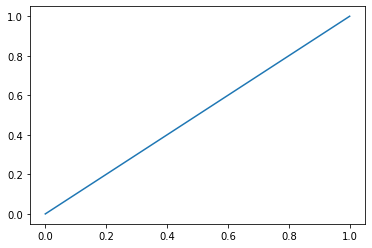

In [45]:
plt.plot(coords['FPR'],coords['TPR'])
plt.show() #e infatti è il random case 

In [46]:
#CODICE PER GENERARE LINE PLOT 3D DELLA ROC 

fig = go.Figure(data=go.Scatter3d(
    x= coords['TP'], 
    y= coords['TN'], 
    z=coords['FP'],
    marker=dict(
        size=1, #pallini per quelli assocaiti al threshold quindi in realtà
        #color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=3
    )
))

"""
fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
"""

fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], 
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        color ='lightgrey',
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])



fig.show()

In [22]:
#QUI CON LO SLIDER - commentata per non averla ogni volta (e comnque viz poco utile visto che sono 2 punti)

"""

fig = px.scatter_3d(coords, 
                    x='TP',
                    y='TN',
                    z='FP',
                    animation_frame='threshold',
                    size_max=18,
                    hover_name ='threshold',
                    range_x=[0,1], 
                    range_y=[0,1],
                    range_z=[0,1]) 


fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='black')),
                  selector=dict(mode='circle-open'))



fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], #verticalmente ho definito O, C, B, A
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        color ='lightgrey',
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])

"""

"\n\nfig = px.scatter_3d(coords, \n                    x='TP',\n                    y='TN',\n                    z='FP',\n                    animation_frame='threshold',\n                    size_max=18,\n                    hover_name ='threshold',\n                    range_x=[0,1], \n                    range_y=[0,1],\n                    range_z=[0,1]) \n\n\nfig.update_traces(marker=dict(size=12,\n                              line=dict(width=2,\n                                        color='black')),\n                  selector=dict(mode='circle-open'))\n\n\n\nfig.add_trace(go.Figure(data=[\n    go.Mesh3d(\n        x=[0, 0, 0, 1], #verticalmente ho definito O, C, B, A\n        y=[0, 0, 1, 0],\n        z=[0, 1, 0, 0],\n\n        color ='lightgrey',\n        opacity = 0.2, #for transparency\n        \n        # i, j and k sono i vertici dei triangoli\n        # here we represent the 4 triangles of the tetrahedron surface\n        i=[0, 0, 0, 1],\n        j=[1, 2, 3, 2],\n        k

In [47]:
"""
fig = px.scatter_3d(coords, 
                    x='TP',
                    y='TN',
                    z='FP',
                    size_max=18,
                    hover_name ='threshold',
                    range_x=[0,1], 
                    range_y=[0,1],
                    range_z=[0,1]) 


fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], 
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        
        color ='lightgrey',
        
        # Intensity of each vertex, which will be interpolated and color-coded
        #intensity=[0, 0.33, 0.66, 1],
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])


#QUI HO LO STESSO PROBLEMA CHE VOGLIO LA LINEA NON I PUNTI, NON STO RIUSCENDO ma mi sembra risolvibile 
#-> TODO ma una volta risolto sopra qui sarà lo stesso 
"""

"\nfig = px.scatter_3d(coords, \n                    x='TP',\n                    y='TN',\n                    z='FP',\n                    size_max=18,\n                    hover_name ='threshold',\n                    range_x=[0,1], \n                    range_y=[0,1],\n                    range_z=[0,1]) \n\n\nfig.add_trace(go.Figure(data=[\n    go.Mesh3d(\n        x=[0, 0, 0, 1], \n        y=[0, 0, 1, 0],\n        z=[0, 1, 0, 0],\n\n        \n        color ='lightgrey',\n        \n        # Intensity of each vertex, which will be interpolated and color-coded\n        #intensity=[0, 0.33, 0.66, 1],\n        \n        opacity = 0.2, #for transparency\n        \n        # i, j and k sono i vertici dei triangoli\n        # here we represent the 4 triangles of the tetrahedron surface\n        i=[0, 0, 0, 1],\n        j=[1, 2, 3, 2],\n        k=[2, 3, 1, 3],\n        name='y',\n        showscale=True\n    )\n]).data[0])\n\n\n#QUI HO LO STESSO PROBLEMA CHE VOGLIO LA LINEA NON I PUNTI, NON 

# codice per plottare quella media

Il ragionamento che seguo è praticamente l'unione dei due precedenti cioè prendo le mie probabilità predette e ci aggiungo un po' di random che dovrebbe darmi una performance intermedia <br>
Ma il problema è che mentre nel vero random questo funziona perchè uso random.randint(0,1,N) mi genero casualmente degli 0 o 1 <br> mentre qui va bene random ma capisco che il problema è che sto generando delle probabilità senza veramente vincolarle ma non capisco come risolvere

In [54]:
"""

all_nCM = []
all_ts = []

all_TPR = []
all_FPR = []


N= len(y_test)
for i in range(len(thresholds)):
    t = thresholds[i]
    all_ts.append(round(t,3))
    t_vec = np.ones(preds.size)*t #t con dimensioni comparabili        questi sono tentativi di portare il tutto non negativo
    y_pred = (np.random.uniform(0,2,N)*np.ones(preds.size)*(0.1)+np.ones(preds.size)*(-0.01)+preds >= t_vec).astype(int)
    norm = np.linalg.norm(y_pred)   #quindi sbaglio qui - ma sembra non esistere un random float 
    y_pred = y_pred/norm            # np.random.uniform(0,2,N)*np.ones(preds.size)*(0.1) -> tutto questo solo per generarmi quella io intendo come randomness 
                                    #che vado letteralmente ad aggiungere alle preds 

    (TN, FP,FN, TP) = generate_matrix_entries(y_test, y_pred)
    print(TN,FP,FN,TP)

    #each_CM = np.array([TN, FP,FN, TP])
    
    #each_FPR = FP/(FP+TN) #1-specificity --> x
    #each_TPR = TP/(TP+FN) #sensitivity -->y

    
    
    each_nCM = each_CM/N
    all_nCM.append(each_nCM)
    
    all_FPR.append(each_FPR)
    all_TPR.append(each_TPR)
    

PD_all_nCM = pd.DataFrame(all_nCM) 


#PRIMA DI DROPPARE 
coords = PD_all_nCM_bad.drop([2],axis=1)
coords['threshold'] = all_ts_bad
coords.rename({0: 'TN', 1: 'FP', 3: 'TP'}, axis=1, inplace=True)

coords['TPR']=all_TPR
coords['FPR']=all_FPR

coords


"""

"\n\nall_nCM = []\nall_ts = []\n\nall_TPR = []\nall_FPR = []\n\n\nN= len(y_test)\nfor i in range(len(thresholds)):\n    t = thresholds[i]\n    all_ts.append(round(t,3))\n    t_vec = np.ones(preds.size)*t #t con dimensioni comparabili        questi sono tentativi di portare il tutto non negativo\n    y_pred = (np.random.uniform(0,2,N)*np.ones(preds.size)*(0.1)+np.ones(preds.size)*(-0.01)+preds >= t_vec).astype(int)\n    norm = np.linalg.norm(y_pred)   #quindi sbaglio qui - ma sembra non esistere un random float \n    y_pred = y_pred/norm            # np.random.uniform(0,2,N)*np.ones(preds.size)*(0.1) -> tutto questo solo per generarmi quella io intendo come randomness \n                                    #che vado letteralmente ad aggiungere alle preds \n\n    (TN, FP,FN, TP) = generate_matrix_entries(y_test, y_pred)\n    print(TN,FP,FN,TP)\n\n    #each_CM = np.array([TN, FP,FN, TP])\n    \n    #each_FPR = FP/(FP+TN) #1-specificity --> x\n    #each_TPR = TP/(TP+FN) #sensitivity -->y\n\

# Per ottenere una ROC intermedia invece di cercare di ottenere diverse probabilità predette (y_pred) [quindi operando sul modello] potrei fare la cosa super ignorante di modificare y_test [quindi operando sui dati] -  ovviamente non è good practice ma sarebbe giusto per ottenere una visualizzazione intermedia da discutere



Of course it's bad practice, of course I am not supposed to do it .... but maybe  (https://www.youtube.com/watch?v=6FThWZjL_o4)

In [86]:
#y_test_ROC_int = y_test.copy()
L = int(y_test.shape[0]/2)

actual__p_yTest = y_test[:L]
portion_of_y_test #questi 64 effettivamente del mio vettore di controllo me li unisco con gli altri 64 randomici (sotto)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [87]:
rs.seed(0)
random_p_yTest = np.random.randint(0,2,L) #praticamente randomizzo parte del vettore di test per peggiorare la performance
random_p_yTest

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [89]:
y_test_ROCm = np.concatenate((portion_of_y_test,random_p_yTest))
y_test_ROCm

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [90]:
all_nCM = []
all_ts = []
all_TPR = []
all_FPR = []

N= len(y_test)

for i in range(len(thresholds)):
    
    t = thresholds[i]
    all_ts.append(round(t,3)) #che poi me lo metto nel dataframe 
    
    t_vec = np.ones(preds.size)*t #t mi serve con dimensioni comparabili 
                                  #alla y_pred (quindi è vettore colonna con singolo t ripetuto)
        
    y_pred = (preds >= t_vec).astype(int) #vettore di boolean poi turned into binary
                                          #risultante dal confronto di P(Y=1) >= threshold (confronto vettori)
    
    (TN, FP, FN, TP) = generate_matrix_entries(y_test_ROCm, y_pred)
    
    each_CM = np.array([TN, FP,FN, TP])
    
    each_FPR = FP/(FP+TN) # = 1-specificity --> x
    each_TPR = TP/(TP+FN) # = sensitivity --> y
    
    
    each_nCM = each_CM/N
    all_nCM.append(each_nCM)
    
    all_FPR.append(each_FPR)
    all_TPR.append(each_TPR)
    

PD_all_nCM = pd.DataFrame(all_nCM) 


coords = PD_all_nCM.drop([2],axis=1) #coordinata di FN non ci interessa

coords['threshold'] = all_ts
coords.rename({0: 'TN', 1: 'FP', 3: 'TP'}, axis=1, inplace=True)

coords['TPR']=all_TPR
coords['FPR']=all_FPR   #per avere tutto in un unico df (quindi a sx coord per 3D, a dx coord per 2D)

coords


,TN,FP,TP,threshold,TPR,FPR
0,0.000000,0.445312,0.554688,0.00,1.000000,1.000000
1,0.125000,0.320312,0.515625,0.01,0.929577,0.719298
2,0.187500,0.257812,0.507812,0.02,0.915493,0.578947
3,0.187500,0.257812,0.492188,0.03,0.887324,0.578947
4,0.187500,0.257812,0.484375,0.04,0.873239,0.578947
...,...,...,...,...,...,...
96,0.328125,0.117188,0.390625,0.96,0.704225,0.263158
97,0.328125,0.117188,0.359375,0.97,0.647887,0.263158
98,0.343750,0.101562,0.351562,0.98,0.633803,0.228070
99,0.351562,0.093750,0.328125,0.99,0.591549,0.210526


In [91]:
#CODICE PER GENERARE LINE PLOT 3D DELLA ROC 

fig = go.Figure(data=go.Scatter3d(
    x= coords['TP'], 
    y= coords['TN'], 
    z=coords['FP'],
    marker=dict(
        size=1, #pallini per quelli assocaiti al threshold quindi in realtà
        #color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='green',
        width=3
    )
))

"""
fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
"""

fig.add_trace(go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], 
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],

        color ='lightgrey',
        
        opacity = 0.2, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
]).data[0])



fig.show()

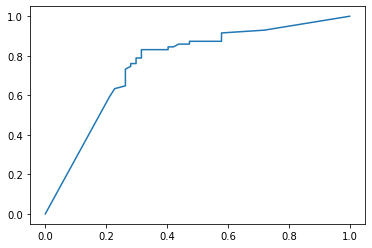

In [93]:
plt.plot(coords['FPR'],coords['TPR'])
plt.show() #ROC intermedia ottenuta